In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure

In [3]:
output_notebook()

Loading BokehJS ...

### Exploratory Data Analysis

In [5]:
df_a = pd.read_csv('anime.csv')
df_r = pd.read_csv('rating.csv')

In [6]:
df_a.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
df_a.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

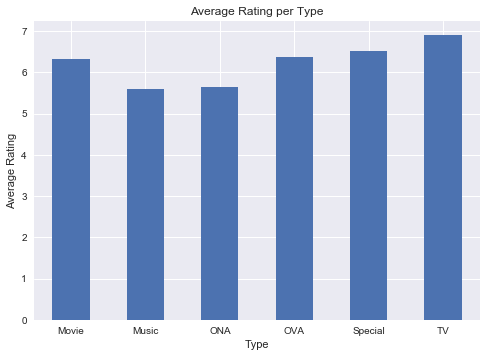

In [8]:
#average ratings per type on myanimelist
df_a.groupby(by = 'type').rating.mean().plot(kind = 'bar', title = 'Average Rating per Type')
plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

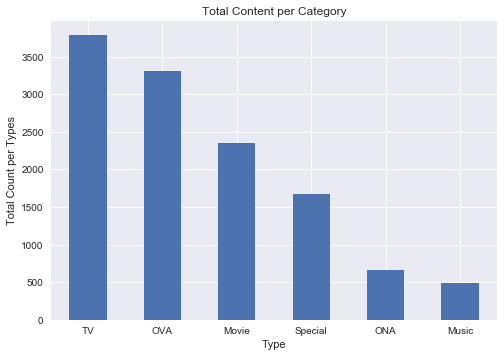

In [9]:
#which type has the most content?
df_a.type.value_counts().plot(kind = 'bar', title = 'Total Content per Category')
plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Total Count per Types')
plt.show()

In [10]:
#what specific content are by far the most popular(total number of member)?

df_temp = df_a.sort_values(by = 'members', ascending = False)

count = []
name = []
category = []
rating = []
track = 0

for idx, series in df_temp.iterrows():
    if track != 20:
        count.append(series['members']/100000)
        name.append(series['name'])
        category.append(series['type'])
        rating.append(series['rating'])
        track +=1 
        
count.reverse()
name.reverse()
category.reverse()
rating.reverse()

In [11]:
#what content has the highest ratings given that they have a good fanbase?
df_temp1 = df_a.sort_values(by = 'rating', ascending = False)

count1 = []
name1 = []
category1 = []
rating1 = []
track = 0

for idx, series in df_temp1.iterrows():
    if track != 20:
        if series['members'] > 100000:
            count1.append(series['members'])
            name1.append(series['name'])
            category1.append(series['type'])
            rating1.append(series['rating'])
            track +=1 
        
count1.reverse()
name1.reverse()
category1.reverse()
rating1.reverse()

In [12]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, HoverTool

s = ColumnDataSource(data = {'Members':count, 'name': name, 'category': category, 'rating':rating})
p_pop = figure(y_range = name,  title = 'Top 20 Most Popular Content', plot_width = 800, plot_height = 300, y_axis_label = 'Content', x_axis_label = 'No. of Members(Hundred Thousands)')

p_pop.hbar(y = 'name', right = 'Members', left = 0, height = 0.4, source = s)
hover = HoverTool(tooltips=[('Category', '@category'), ('Rating', '@rating')])
p_pop.add_tools(hover)

source1 = ColumnDataSource(data = {'Members':count1, 'name': name1, 'category': category1, 'rating':rating1})
high_rate = figure(y_range = name1, title = 'Top 20 Highest Rated Content', plot_width = 800, plot_height = 300, y_axis_label = 'Content', x_axis_label = 'Rating')
high_rate.hbar(y = 'name', right = 'rating', left = 0, height = .4, source = source1)
hover1 = HoverTool(tooltips = [('Category', '@category'),('Members', '@Members')])
high_rate.add_tools(hover1)

layout = column(p_pop, high_rate)
show(layout)

In [13]:
#these four shows are both within the top 20 of being the most popular and having the highest rating
set(name).intersection(set(name1))

{'Code Geass: Hangyaku no Lelouch',
 'Code Geass: Hangyaku no Lelouch R2',
 'Fullmetal Alchemist: Brotherhood',
 'Steins;Gate'}

### The most popular contents usually contain actions while the highest rated content are usually shounen which is a genre that targets teenage male audience.

In [14]:
#top 20 most popular content genres
from collections import Counter
#getting every single genre of a content
genre_count = []
for idx, series in df_temp.iloc[0:20].iterrows():
    for genre in series['genre'].split(','):
        genre_count.append(genre)

#counting the genres in the top 20        
genre_dict = Counter(genre_count)
g, c = zip(*genre_dict.items())

f = figure(y_range = g, title = "Top 20 Most Popular Contents' Genres", plot_height = 400, plot_width = 400, x_axis_label = 'Count', y_axis_label = 'Genres')
f.hbar(y = g, right = c, left = 0, height = 0.4)

#top 20 highest rated shows genre

g_count = []
for idx, series in df_temp1.iloc[0:20].iterrows():
    for gen in series['genre'].split(','):
        g_count.append(gen)

g_count = Counter(g_count)
g,c = zip(*g_count.items())

f1 = figure(y_range = g, title = "Top 20 Highest Rated Contents' Genres", plot_height = 400, plot_width = 400, x_axis_label = 'Count', y_axis_label = 'Genres')
f1.hbar(y = g, right = c, left = 0, height = .4)
layout = column(f, f1)
show(layout)

### Explicit Collaborative Filtering Recommender System

In [15]:
df_a.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [16]:
df_r.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [32]:
#merge the two tables together
df = df_a.merge(df_r, how = 'inner', on = 'anime_id', suffixes = ['_avg', ''])
df.head()

,anime_id,name,genre,type,episodes,rating_avg,members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [54]:
#filter out records where no ratings were given after watching (-1)
df = df[df.rating != -1]
#create two new columns to be of category type so that indexes can be given to them
df['u_code'] = df['user_id'].astype('category').cat.codes
df['a_code'] = df['anime_id'].astype('category').cat.codes

In [55]:
df.head()

,anime_id,name,genre,type,episodes,rating_avg,members,user_id,rating,u_code,a_code
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,92,7771
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,143,7771
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,230,7771
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,256,7771
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,304,7771


In [56]:
#total of 9555 unique users and 7942 movies
len(df.u_code.unique()), len(df.a_code.unique())

(9555, 7942)

In [58]:
#surprise API only takes the dataframe in this format
df_rating = df[['u_code', 'a_code', 'rating']]
df_rating.head()

,u_code,a_code,rating
0,92,7771,5
1,143,7771,10
2,230,7771,10
3,256,7771,10
5,304,7771,10


In [59]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import accuracy
import random
from collections import defaultdict

In [60]:
#instantiate the reader object to parse my dataframe
reader = Reader(rating_scale = (1, 10))
data = Dataset.load_from_df(df_rating, reader)

/anaconda/lib/python3.6/site-packages/scikit_surprise-1.0.6-py3.6-macosx-10.7-x86_64.egg/surprise/dataset.py:61: UserWarning: Using rating_scale from reader, deprecated. Set rating_scale at dataset creationg instead (load_from_file, load_from_folds, or load_from_df).
  warnings.warn('Using rating_scale from reader, deprecated. Set '


In [80]:
#Because GridSearchCV requires to be trained on (Dataset Class), train_test_split cannot be used to partition the 
#dataset because that results in a Trainset

#setting data raw_ratings attribute to raw ratings
raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 80% of the data, B = 20% of the data
threshold = int(.8 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

In [92]:
#the split of A_raw_rating is now in data only
len(data.raw_ratings), len(A_raw_ratings)

(683290, 683290)

In [88]:
#GridSearchCV for the best parameters
param_grid = {'n_factors': [20, 40, 60, 80, 100], 'lr_all': [.002, .005, .01], 'reg_all':[.001, .01, .1, 1, 10] }
grid_search = GridSearchCV(SVD, param_grid = param_grid, cv = 5, measures = ['RMSE', 'MAE'])
grid_search.fit(data)

In [116]:
#these two metrics gave the same parameters
grid_search.best_params['rmse'], grid_search.best_params['mae']

({'lr_all': 0.01, 'n_factors': 100, 'reg_all': 0.1},
 {'lr_all': 0.01, 'n_factors': 100, 'reg_all': 0.1})

In [100]:
# retrain on the whole set A
trainset = data.build_full_trainset()
alg = SVD(n_factors = 100, lr_all = .01, reg_all = .1, random_state = 42)
alg.fit(trainset)

# Compute biased accuracy on A
predictions = alg.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

# Compute unbiased accuracy on B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = alg.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

Biased accuracy on A,   RMSE: 0.9538
Unbiased accuracy on B, RMSE: 1.1558


1.1557962102618344

In [117]:
df.head()

,anime_id,name,genre,type,episodes,rating_avg,members,user_id,rating,u_code,a_code
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,92,7771
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,143,7771
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,230,7771
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,256,7771
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,304,7771


In [121]:
#To test for a particular user and item predict(uid, iid, r_ui=None, clip=True, verbose=False)
alg.predict(5273, 4738)

Prediction(uid=5273, iid=4738, r_ui=None, est=8.0831760369423939, details={'was_impossible': False})

In [148]:
def get_top_n(preds, n):
    """get the top n predictions from the model for the user base on the estimated rating.
    
    Parameter:
    
    preds: predictions from the model
    
    n: the top n recommended items for a user
    
    """
    top_n = defaultdict(list)
    for u_id, i_id, r, est, _ in preds:
        top_n[u_id].append((i_id, est))
    
    for u_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[u_id] = user_ratings[:n]
        
    return top_n

In [222]:
ref = get_top_n(predictions, 10)

In [223]:
items = []
scores = []
for item, score in ref[92]:
    scores.append(score)
    items.append(item)
    
rec = list(zip(list(df.name[df.a_code.isin(items)].unique()), scores))

In [224]:
rec

[('Natsume Yuujinchou Shi', 7.7287251194141771),
 ('Natsume Yuujinchou San', 7.4115586284081516),
 ('Hotaru no Haka', 7.2890937316559219),
 ('Evangelion: 2.0 You Can (Not) Advance', 7.2698394124945906),
 ('Fate/Zero', 7.1742052727613954),
 ('Samurai Champloo', 7.1310487955809778),
 ('NHK ni Youkoso!', 6.9725452856667385),
 ('Kotonoha no Niwa', 6.8160645939784494),
 ('Paprika', 6.5731970210327546),
 ('Byousoku 5 Centimeter', 6.5066392183712844)]